In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from collections import Counter
from sklearn.model_selection import train_test_split

In [10]:
file = r'ClaveVectors_Firm-Teacher_Model.txtClaveVectors_Firm-Teacher_Model.txt'
read = pd.read_excel(file)

In [11]:
read

Case # Class           I0     PA500       HFS           DA  \
0         1   car   524.794072  0.187448  0.032114   228.800228   
1         2   car   330.000000  0.226893  0.265290   121.154201   
2         3   car   551.879287  0.232478  0.063530   264.804935   
3         4   car   380.000000  0.240855  0.286234   137.640111   
4         5   car   362.831266  0.200713  0.244346   124.912559   
..      ...   ...          ...       ...       ...          ...   
101     102   adi  2000.000000  0.106989  0.105418   520.222649   
102     103   adi  2600.000000  0.200538  0.208043  1063.441427   
103     104   adi  1600.000000  0.071908 -0.066323   436.943603   
104     105   adi  2300.000000  0.045029  0.136834   185.446044   
105     106   adi  2600.000000  0.069988  0.048869   745.474369   

              Area        A/DA      Max IP          DR            P  
0      6843.598481   29.910803   60.204880  220.737212   556.828334  
1      3163.239472   26.109202   69.717361   99.084964   400.225776  
2     11888.391827   44.894903   77.793297  253.785300   656.769449  
3      5402.171180   39.248524   88.758446  105.198568   493.701814  
4      3290.462446   26.342127   69.389389  103.866552   424.796503  
..             ...         ...         ...         ...          ...  
101   40087.920984   77.059161  204.090347  478.517223  2088.648870  
102  174480.476218  164.071543  418.687286  977.552367  2664.583623  
103   12655.342135   28.963331  103.732704  432.129749  1475.371534  
104    5086.292497   27.427344  178.691742   49.593290  2480.592151  
105   39845.773698   53.450226  154.122604  729.368395  2545.419744  

[106 rows x 11 columns]

In [12]:
read.head()

Case # Class          I0     PA500       HFS          DA          Area  \
0       1   car  524.794072  0.187448  0.032114  228.800228   6843.598481   
1       2   car  330.000000  0.226893  0.265290  121.154201   3163.239472   
2       3   car  551.879287  0.232478  0.063530  264.804935  11888.391827   
3       4   car  380.000000  0.240855  0.286234  137.640111   5402.171180   
4       5   car  362.831266  0.200713  0.244346  124.912559   3290.462446   

        A/DA     Max IP          DR           P  
0  29.910803  60.204880  220.737212  556.828334  
1  26.109202  69.717361   99.084964  400.225776  
2  44.894903  77.793297  253.785300  656.769449  
3  39.248524  88.758446  105.198568  493.701814  
4  26.342127  69.389389  103.866552  424.796503

In [13]:
read.shape

(106, 11)

In [14]:
X = range(read['Class'].size)
Y = read['Class']

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(read.drop('Class', axis = 1))
scaled_features = scaler.transform(read.drop('Class', axis = 1))

df_feat = pd.DataFrame(scaled_features, columns = read.columns[:-1])
df_feat.head()


Case #     Class        I0     PA500       HFS        DA      Area  \
0 -1.715787 -0.345766  0.985996 -0.818664  0.201326 -0.026581  0.276930   
1 -1.683105 -0.605358  1.563752  1.493038 -0.365533 -0.225601  0.113379   
2 -1.650424 -0.309671  1.645558 -0.507207  0.390925  0.246221  0.921566   
3 -1.617742 -0.538725  1.768267  1.700676 -0.278719 -0.104528  0.678651   
4 -1.585060 -0.561605  1.180285  1.285400 -0.345742 -0.218721  0.123400   

       A/DA    Max IP        DR  
0 -0.187452  0.299396 -0.334219  
1 -0.069958 -0.374756 -0.540435  
2  0.029793  0.482536 -0.202616  
3  0.165230 -0.340877 -0.417345  
4 -0.074009 -0.348258 -0.508080

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, read['Class'], test_size = 0.30)

# Remember that we are trying to come up
# with a model to predict whether
# someone will TARGET CLASS or not.
# We'll start with k = 1.

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
# Let's evaluate our KNN model !
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))


[[5 0 1 0 0 0]
 [0 7 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 6 0 0]
 [0 0 0 0 6 0]
 [0 1 0 1 0 4]]
              precision    recall  f1-score   support

         adi       1.00      0.83      0.91         6
         car       0.88      1.00      0.93         7
         con       0.50      1.00      0.67         1
         fad       0.86      1.00      0.92         6
         gla       1.00      1.00      1.00         6
         mas       1.00      0.67      0.80         6

    accuracy                           0.91        32
   macro avg       0.87      0.92      0.87        32
weighted avg       0.93      0.91      0.91        32



Text(0, 0.5, 'Error Rate')

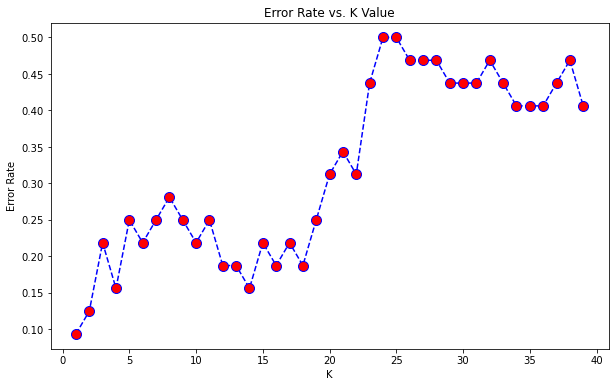

In [18]:
error_rate = []

# Will take some time
for i in range(1, 40):
	
	knn = KNeighborsClassifier(n_neighbors = i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
				linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))


# NOW WITH K = 3
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 3')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K = 1


[[5 0 1 0 0 0]
 [0 7 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 6 0 0]
 [0 0 0 0 6 0]
 [0 1 0 1 0 4]]


              precision    recall  f1-score   support

         adi       1.00      0.83      0.91         6
         car       0.88      1.00      0.93         7
         con       0.50      1.00      0.67         1
         fad       0.86      1.00      0.92         6
         gla       1.00      1.00      1.00         6
         mas       1.00      0.67      0.80         6

    accuracy                           0.91        32
   macro avg       0.87      0.92      0.87        32
weighted avg       0.93      0.91      0.91        32

WITH K = 3


[[5 0 1 0 0 0]
 [0 7 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 3 0 3]
 [0 0 0 0 5 1]
 [0 1 0 1 0 4]]


              precision    recall  f1-score   support

         adi       1.00      0.83      0.91         6
         car       0.88      1.00      0.93         7
         con       0.50      1.00      0.67         1
         fad       0.75     